# (Part 2.) Introduction to GIS bases 

In [3]:
# Import the rasterio library for working with raster data
import rasterio

# Import specific modules and functions from rasterio for masking, plotting, and memory file handling
from rasterio import mask, transform
from rasterio.plot import show
from rasterio.io import MemoryFile

# Import the requests library for making HTTP requests
import requests

# Import the osmnx library for working with OpenStreetMap data
import osmnx as ox

# Import the numpy library for numerical computing
import numpy as np

# Import the pyplot module from matplotlib for plotting
import matplotlib.pyplot as plt

import geopandas as gpd


Before we start... 
- Does somebody knows what an array is? 
- and a matrix ? 

(ANETA: Indexing Demo :)

Arrays and matrices are both data structures used to store collections of elements, but they differ in their dimensions.  

Array: An array is a one-dimensional data structure that stores elements of the same data type sequentially. Each element in an array is accessed using an index. Arrays are versatile and can store various types of data, such as integers, strings, or even other arrays.


In [57]:
# Define an array
my_array = [1, 2, 3, 4, 5]

my_array

[1, 2, 3, 4, 5]

In [58]:
# Access elements of the array
print("First element:", my_array[0])  # Output: 1
print("Second element:", my_array[1])  # Output: 2

First element: 1
Second element: 2



Matrix: A matrix is a two-dimensional data structure that represents a grid of elements arranged in rows and columns. It is essentially a specialized form of an array where elements are organized in a rectangular shape. Matrices are commonly used in mathematics, computer graphics, and scientific computing for tasks like linear algebra operations, image processing, and solving systems of equations.

In [59]:
# Define a matrix (2D array)
my_matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

my_matrix


[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [60]:
# Access elements of the matrix
print("Element at row 1, column 1:", my_matrix[0][0])  # Output: 1
print("Element at row 2, column 3:", my_matrix[1][2])  # Output: 6

Element at row 1, column 1: 1
Element at row 2, column 3: 6


##  Rasters 
Raster data in the simpliest of definition is an image. 
An image or any pixelated data where each pixel is associated with a specific geographical location. 
 

For instances let's create a random array: 

In [5]:
# Create a two dimension array (matrix) containing 5 x 5 cells.  
X=np.random.randint(25, size=(5, 5))
X

array([[13,  7, 12,  9, 15],
       [15, 21,  8, 15, 13],
       [14, 16,  0,  6,  2],
       [19, 23, 11,  5, 12],
       [22,  6, 19, 21,  5]])

And then lets visualize the array as an image with the value on each cell/"pixel":

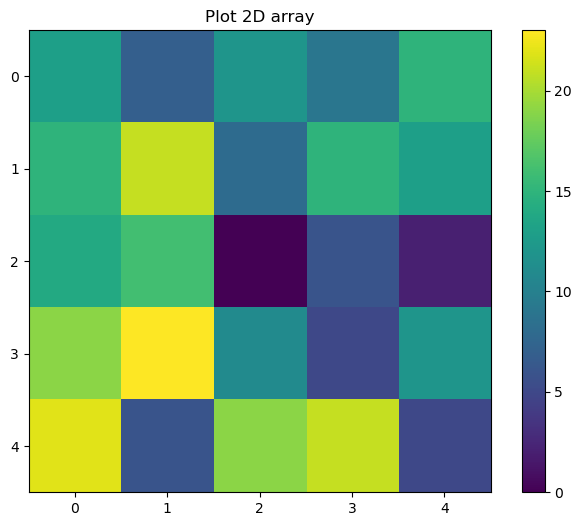

In [6]:
fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.colorbar()
plt.show()

Now, the value of the raster can be, as shown above, (a) continuous or (b) categorical.

(a)  Continuous

In a continuous raster, the phenomena represented have no clear boundaries. 
The value assigned to each cell/pixel is what is found at the center of the cell. 
E.g to represent elevation, precipitation, chemical concentrations, or distance from a road...


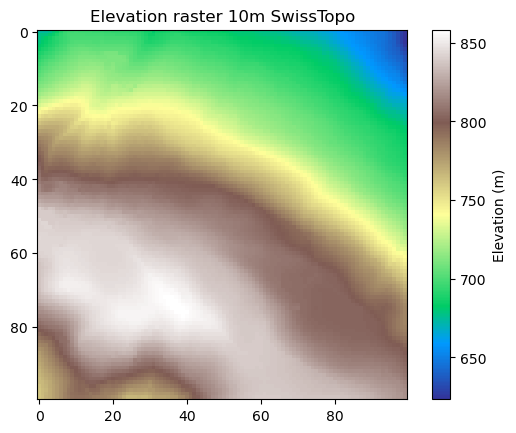

In [7]:
# Open the raster file
with rasterio.open("../data/SWISSALTI3D_TIFF_CHLV95_LN02/10m/SWISSALTI3D_10_TIFF_CHLV95_LN02_2600_1196.tif") as src:
    # Plot the raster using imshow
    plt.imshow(src.read(1), cmap='terrain')
    plt.colorbar(label='Elevation (m)')
    plt.title("Elevation raster 10m SwissTopo")
    plt.show()

(b)  Categorical 

 (or discrete data) Represent thematic information. For example, this could be a file containing land cover data in raster format. Each pixel then has a value corresponding to a specific ground cover type (for instance, a pixel with the value 1 represents sand, a pixel with the value 2 represents water, etc.). 

 ![](../images/raster_concept.png)

 ([Source: National Ecological Observatory Network (NEON)](https://kodu.ut.ee/~kmoch/geopython2021/L5/raster.html))


### Rasters fun facts... 

- **Resolution**:
Rasters have a resolution, which determines the size of the grid cells. Higher resolution means smaller cells and more detail, while lower resolution means larger cells and less detail.

- **Raster Formats**:
Common raster formats include TIFF (Tagged Image File Format), JPEG, PNG, and GeoTIFF. Each format has its own characteristics and is suitable for different types of data and applications.

- **Spatial Reference**:
Raster data is georeferenced, meaning it is associated with a specific coordinate system and projection. (more on that later)



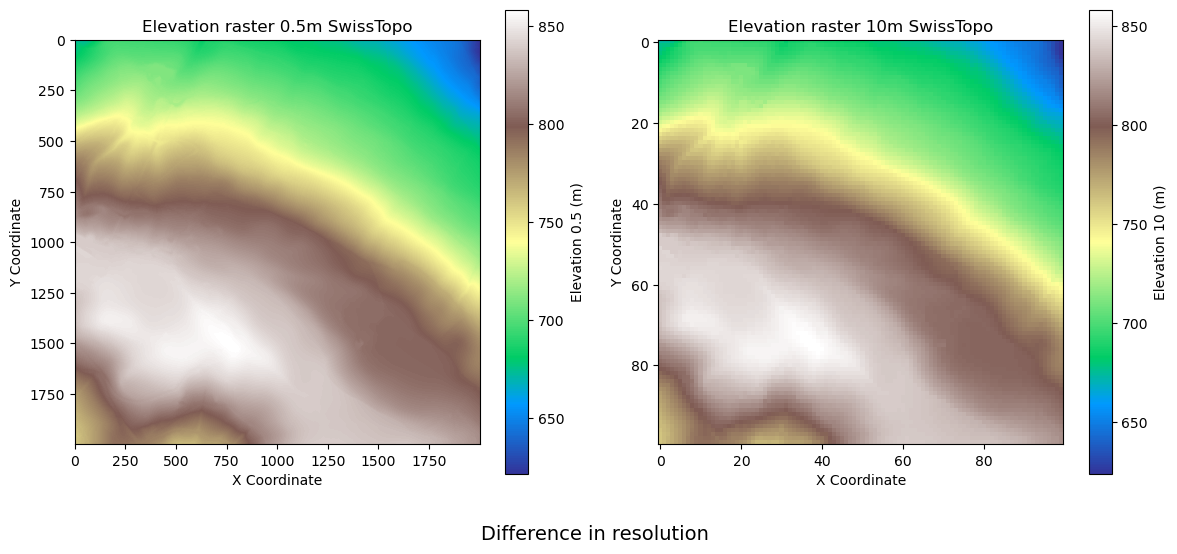

In [22]:
# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Open the raster file for 0.5m resolution
with rasterio.open("../data/SWISSALTI3D_TIFF_CHLV95_LN02/0.5m/SWISSALTI3D_0.5_TIFF_CHLV95_LN02_2600_1196.tif") as src:
    # Plot the raster using imshow
    im1 = axes[0].imshow(src.read(1), cmap='terrain')
    axes[0].set_title("Elevation raster 0.5m SwissTopo")
    axes[0].set_xlabel('X Coordinate')
    axes[0].set_ylabel('Y Coordinate')
    plt.colorbar(im1, ax=axes[0], label='Elevation 0.5 (m)')

# Open the raster file for 1m resolution
with rasterio.open("../data/SWISSALTI3D_TIFF_CHLV95_LN02/10m/SWISSALTI3D_10_TIFF_CHLV95_LN02_2600_1196.tif") as src:
    # Plot the raster using imshow
    im2 = axes[1].imshow(src.read(1), cmap='terrain')
    axes[1].set_title("Elevation raster 10m SwissTopo")
    axes[1].set_xlabel('X Coordinate')
    axes[1].set_ylabel('Y Coordinate')
    plt.colorbar(im2, ax=axes[1], label='Elevation 10 (m)')

# Adjust layout
plt.tight_layout()

# Add a common title below the subplots
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.1, 'Difference in resolution', ha='center', va='center', fontsize=14)


plt.show()

## Vectors vs. Rasters 
So to recap from last week, we have two fundamental data types use in Geographic Information Systems(GIS). which are *vectors and rasters*

Vectors consist of points, lines, and polygons that define discrete features on the Earth's surface, such as roads, rivers, and administrative boundaries. These features are represented by their geometric shapes and attributes, 

In contrast, rasters organize data into a grid of cells, where each cell contains a value representing a continuous or categorical attribute, such as elevation, temperature, or land cover type. 

![](../images/vecras.jpeg)

[Source: city of Tualatin Oregon](https://www.tualatinoregon.gov/maps/other-gis-resources)


## Rasterio 
(https://rasterio.readthedocs.io/en/stable/intro.html)

For the demo we will need the following information : 
- our area of interest, 
- our data (we can either get it directly online or we can save it locally)

In [8]:
city_aoi = "Saint louis Senegal"
# Store the total bounds of the geographical data fetched for the AOI
# xmin, ymin, xmax, ymax = ox.geocode_to_gdf(city_aoi).total_bounds

# URL of the raster file
url = "https://data.worldpop.org/GIS/Population/Global_2000_2020/2006/SEN/sen_ppp_2006.tif"

# Local filepath for the raster file 
raster_filepath = ("../data/sen_ppp_2006.tiff")

For this demo we will be using the Senegal popuplation raster of 2006 from [worldpop](https://data.worldpop.org/GIS/Population/Global_2000_2020/2006/SEN/)

### 1. First Step: Open the raster 
To download the raster: 

In [10]:
# Download the raster file
response = requests.get(url)

# Open the downloaded raster file using rasterio
with MemoryFile(response.content) as memfile:
    with memfile.open() as dataset:
        # Now you can work with the raster dataset
        # For example, you can read the metadata or access the raster data
        print("Raster Metadata:")
        print(dataset.meta)


## Using MemoryFile in this way allows you to work with 
## raster data without having to save it to disk first.

Raster Metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 7425, 'height': 5261, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008333333299663299, 0.0, -17.543749915,
       0.0, -0.00083333332997529, 16.691250134)}


Or you can open the raster locally (provided that you already have it)

For the rest of the examples we are going to use this one

In [11]:
# Open the raster file
with rasterio.open(raster_filepath) as src:
    # Read the metadata
    print(dataset.meta) 

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 7425, 'height': 5261, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008333333299663299, 0.0, -17.543749915,
       0.0, -0.00083333332997529, 16.691250134)}


### Getting to know the **metadata**: 

First thing to notices is the type. we are now working with a dictionary which consist of a key and a value: 

**{**'driver': 'GTiff',

 'dtype': 'float32',

 'nodata': -99999.0,

 'width': 7425,

 'height': 5261,

 'count': 1,

 'crs': CRS.from_epsg(4326),
 
 'transform': Affine(0.0008333333299663299, 0.0, -17.543749915,
                     0.0, -0.00083333332997529, 16.691250134)**}**

And what are this values? 
- driver: The format of the raster file. In this case, it's a GeoTIFF (GTiff).
- dtype: Specifies the data type of the raster values. Here, it's float32, indicating 32-bit floating-point numbers.
- **nodata**: Indicates the value used to represent pixels with no data. In this raster, -99999.0 is used to denote such pixels.
- width: Specifies the width in pixels. This raster has a width of 7425 pixels.
- height: Specifies the height in pixels. This raster has a height of 5261 pixels.
- **count**: Indicates the number of bands or layers in the raster. Here, it's 1, indicating a single-band raster. In an color photo this would be 3(RGB).
- crs:  Coordinate Reference System. In this case, the CRS is EPSG:4326, which corresponds to WGS 84 geographic coordinate system (latitude and longitude).
- transform: Provides information about the affine transformation that maps pixel coordinates to geographic coordinates. It consists of six coefficients: (a, b, c, d, e, f), where:

    - a is the pixel width (in the x-direction)
    - b is the row rotation (typically zero)
    - c is the x-coordinate of the top-left corner of the top-left pixel
    - d is the column rotation (typically zero)
    - e is the pixel height (in the y-direction), negative if the raster is oriented from top to bottom
    - f is the y-coordinate of the top-left corner of the top-left pixel

For those of you that are interested in the tranformation : [Affine transform](https://en.wikipedia.org/wiki/Affine_transformation)





You can acces the metadata with the key values from the dictionary, like this: 

In [25]:
# Open the raster file
with rasterio.open(raster_filepath) as src:
    # Get the crs
    crs = src.crs
    print("- Coordinate Reference System:", crs)

    nodata = src.nodata
    print("- Nodata :", nodata)
    # Get the transformation matrix
    transform = src.transform
    print("- Transformation Matrix:")
    print(transform)

    # Transform pixel coordinates to geographic coordinates
    lon, lat = src.xy(100, 100)  # Example pixel coordinates (100, 100)
    print("- Geographic Coordinates (lon, lat):", lon, lat)



Coordinate Reference System: EPSG:4326
nodata : -99999.0
Transformation Matrix:
| 0.00, 0.00,-17.54|
| 0.00,-0.00, 16.69|
| 0.00, 0.00, 1.00|
Geographic Coordinates (lon, lat): -17.459999915338383 16.607500134337485


### Visualize the raster: 

We can visualize the rasters with 
1. matplotlib.pyplot: 

**plt.imshow()**: Matplotlib's imshow() function is a general-purpose function for displaying images, including raster data. It provides basic functionality for visualizing raster data but lacks some features specific to geospatial data.

2. rasterio.plot.show:  

Rasterio's **show()** function is specifically designed for visualizing geospatial raster data. It offers more advanced features tailored for working with raster datasets, such as handling geographic coordinate systems, applying color ramps, and overlaying geospatial information.

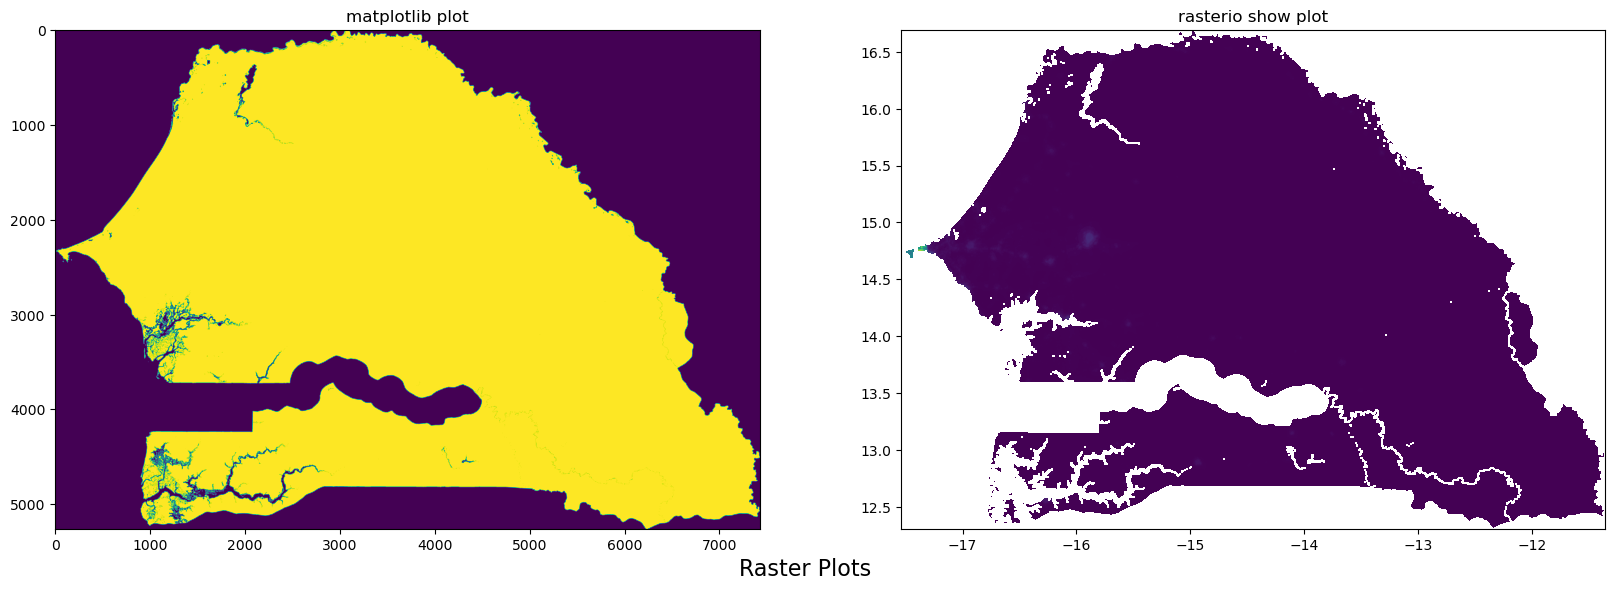

In [42]:
# Open the downloaded raster file using rasterio
with rasterio.open(raster_filepath) as src:
    fig, axes = plt.subplots(1,2,figsize=(20, 10))
    axes[0].imshow(src.read(1), cmap='viridis')
    axes[0].set_title("matplotlib plot")
    axes[1].set_title("rasterio show plot")
    show(src, ax=axes[1], cmap='viridis')


# Add a common title below the subplots
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.25, 'Raster Plots', ha='center', va='center', fontsize=16)
plt.show()


### Shape

In the context of an array, "shape" refers to the dimensions of the array, representing the number of elements along each dimension. 

For example, in a 2D array, the shape would specify the number of rows and columns, while in a 3D array, it would include the number of rows, columns, and layers. 

The shape of an array is represented as a tuple of integers, where each integer corresponds to the size of the array along a particular dimension. 

Understanding the shape of an array is crucial for accessing and manipulating its elements effectively during data processing and analysis.

![](../images/array_shape.webp)

[Source: python_crashkurs_doc](https://fgnt.github.io/python_crashkurs_doc/include/numpy.html)

In [27]:
# Open the raster file
with rasterio.open(raster_filepath) as src:
    array = src.read()

array.shape

(1, 5261, 7425)

- The first number from our *array.shape* represent the raster band (1).
- The second number, represents height (5261).
- The second number, represents width (7425).

In a nutshell, a raster band is a layer of data in a raster image representing a specific attribute, such as color or elevation.

For example: 
In an RGB (Red, Green, Blue) example, each raster band represents the intensity of one of these primary colors across the image. The red band stores information about the intensity of red light for each pixel, the green band stores information about the intensity of green light, and the blue band stores information about the intensity of blue light. By combining these three bands, we can recreate the full spectrum. For instance, a pixel with high intensity in the red band and low intensity in the green and blue bands would appear as a shade of red in the final.



![](../images/bandsrgb.png) 

[Source: GIS Geopraphy](https://gisgeography.com/arcgis-composite-bands/)

Then, in order to plot our raster with matplotlib we need to specifies which layer we are reading: 
*plt.imshow(src.read(1))* - the number 1 inside the src.read(1) function call indicates that you're reading the **first raster band** from the raster file opened with rasterio.open().

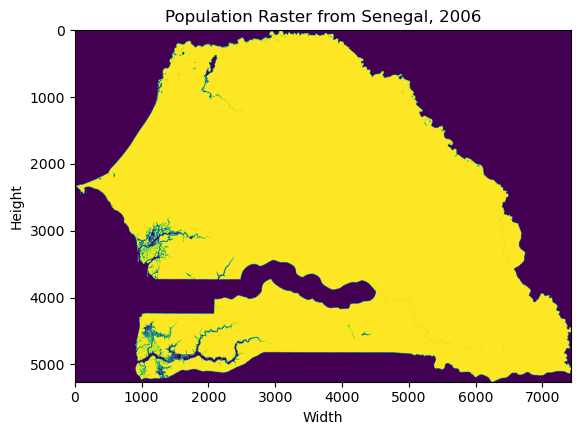

In [47]:
# Open the raster file
with rasterio.open(raster_filepath) as src:
    # Plot the raster
    plt.imshow(src.read(1))
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title("Population Raster from Senegal, 2006")
    plt.show()
    

Then... returning to the shape, if we want to only get the shape, without the raster band information, we could select the 0 index:  

In [61]:
array.shape

(1, 5261, 7425)

In [62]:
print(array[0].shape)


(5261, 7425)


### Select your area of interest 

In order to select our area of interest, we will use the openStreetMaps library (osmnx, ox). 

In [63]:
st_louis_gdf = ox.geocode_to_gdf(city_aoi)
st_louis_gdf.explore()

Visualize the geoDataFrame:

In [65]:
st_louis_gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-16.51600 15.96104, -16.51522 15.960...",16.084759,15.957744,-16.396402,-16.515998,258432754,relation,12989616,16.028045,-16.504869,boundary,administrative,16,0.471615,city,Saint-Louis,"Saint-Louis, Département de Saint-Louis, Saint..."


Select the geometry

In [66]:
st_louis_gdf["geometry"]

0    POLYGON ((-16.51600 15.96104, -16.51522 15.960...
Name: geometry, dtype: geometry

#### Mask function : 
[mask.mask()](https://rasterio.readthedocs.io/en/stable/api/rasterio.mask.html): is a function call to the mask module within the rasterio library. 
This function applies a mask to a raster dataset based on the provided geometries.

We are applying it here to ensuring that only the raster data within the provided geometries (st_louis_gdf geometry) is retained

Output 
- img, tr:  
    - img: the masked raster data, 
    - tr:  the transform representing the affine transformation applied during the masking process.


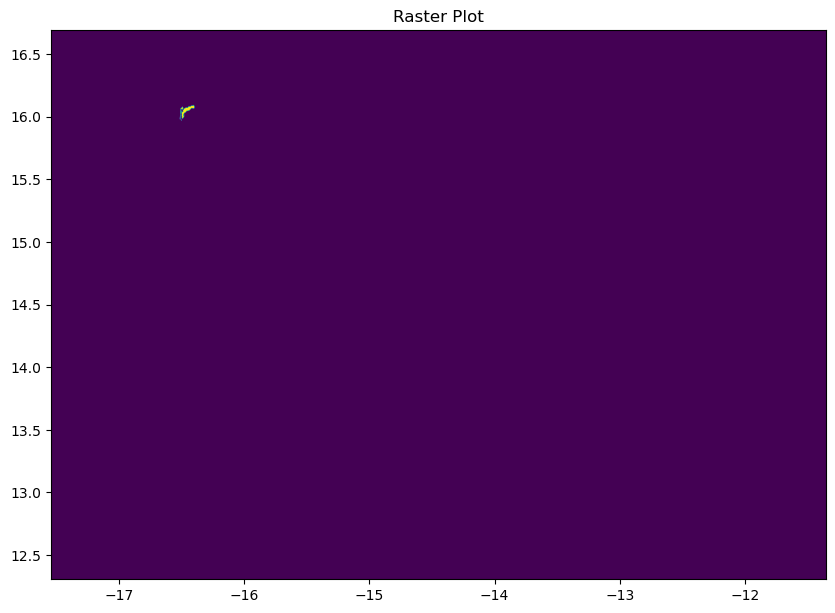

In [64]:
with rasterio.open(raster_filepath) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    # st_louis_gdf.to_crs(src.crs) - ensures that the geometries and the raster dataset have the same spatial reference system
    img, tr = mask.mask(src, st_louis_gdf.to_crs(src.crs)["geometry"])
    show(img, ax=ax, cmap='viridis', transform=tr)
# plt.imshow(img[0])
    plt.title('Raster Plot')
    plt.show()

Once we retained the raster from our Areo Of Interest, we can use the parameter **crop=True** to crop our dataset to only reatins saint louis and not all the empty space : 

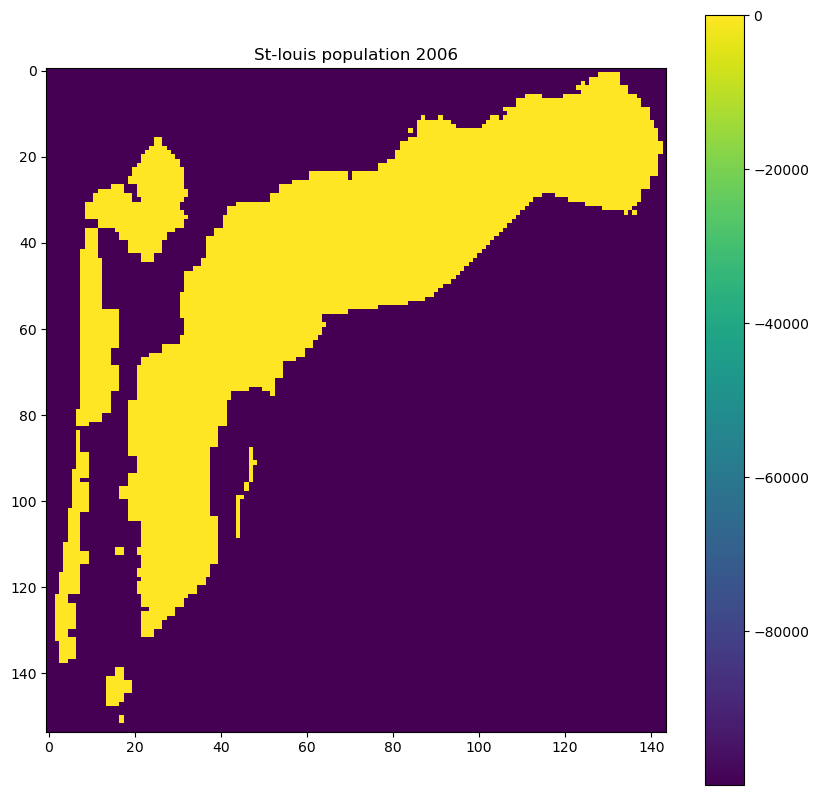

In [71]:
with rasterio.open(raster_filepath) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    # st_louis_gdf.to_crs(src.crs) - ensures that the geometries and the raster dataset have the same spatial reference system
    img, tr = mask.mask(src, st_louis_gdf.to_crs(src.crs)["geometry"], crop=True)
    #show(img, ax=ax, cmap='viridis', transform=tr)
    plt.imshow(img[0])
    plt.colorbar()
    plt.title('St-louis population 2006')
    plt.show()

Is it normal that we dont have any information ? (yellow representing 0 everywhere)

This output comes from the nodata information inside our metadata: 
If we visualize the array, we found that we've got a lot of nodata (in our case -99999)

In [29]:
img

array([[[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        ...,
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
        [-99999., -99999., -99999., ..., -99999., -99999., -99999.]]],
      dtype=float32)

So in percentage we've got 74.63...% of no data in the image and that is why we can't visualize the "real" population data. n

In [76]:
count_nodata = np.count_nonzero(img == -99999)
total_elements = img.size
percentage = (count_nodata / total_elements) * 100

print("Percentage of elements equal to -99999:", percentage, "%")

Percentage of elements equal to -99999: 74.63924963924964 %


So if we don't do anything to "clean" our raster, our calculation later on would be ... wrong. 

For instance, if we sum all the values (normally we would get the poputation), but in our case we get a negative number: 

In [77]:
img.sum() 

-1655084500.0

We will show two ways to clean this data: 

1. We create a array without the nodata 

In [36]:
img[img != -99999]

array([2.9640577, 3.0517764, 3.142604 , ..., 3.8788044, 3.1053464,
       3.0891678], dtype=float32)

In [78]:
img[img != -99999].sum() # people living in st louis. 

98945.125

2. we replace the nodata with 0s 

In [41]:
np.where(img != -99999, img, 0)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [42]:
np.where(img != -99999, img, 0).sum()# people living in st louis. 

98945.12

And when we plot it we can define ourself the nodata value : 

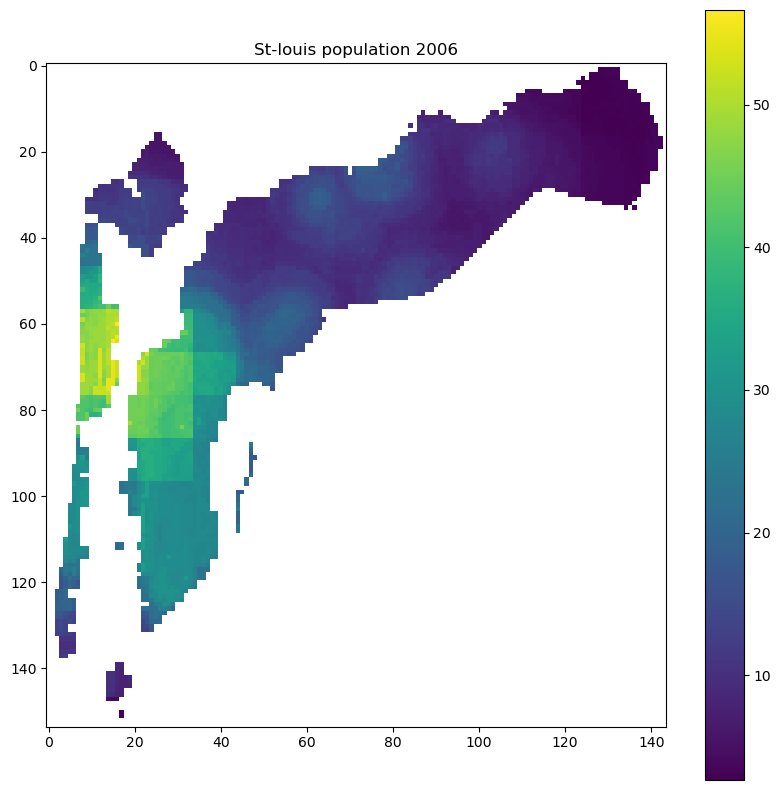

In [82]:
with rasterio.open(raster_filepath) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    # st_louis_gdf.to_crs(src.crs) - ensures that the geometries and the raster dataset have the same spatial reference system
    img, tr = mask.mask(src, st_louis_gdf.to_crs(src.crs)["geometry"], crop=True, nodata=np.nan)
    #show(img, ax=ax, cmap='viridis', transform=tr)
    plt.imshow(img[0])
    plt.colorbar()
    plt.title('St-louis population 2006')
    plt.show()

### Save your new raster 

In [16]:
output_filepath = "../data/sen_ppp_2006.tiff"

# Open the downloaded raster file using rasterio
with rasterio.open(raster_filepath) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    # st_louis_gdf.to_crs(src.crs) - ensures that the geometries and the raster dataset have the same spatial reference system
    img, tr = mask.mask(src, st_louis_gdf.to_crs(src.crs)["geometry"], crop=True)
    out_meta = src.meta.copy()
# crs 
# nodata 
out_meta["width"] = img.shape[2]
out_meta["height"] = img.shape[1]
out_meta["transform"] = tr

with rasterio.open(output_filepath, 'w', **out_meta) as out:
    out.write(img)